In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('/config/workspace/Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# no null value so we are good to go
# as in describe we can see that thee are values shown as 0 for the features gluscose, blood pressure, skinthicknes,insulin ,bmi that cant be so we need to change values with their mean or the median
df['BMI']= df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']= df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']= df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Glucose']= df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin']= df['Insulin'].replace(0,df['Insulin'].mean())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

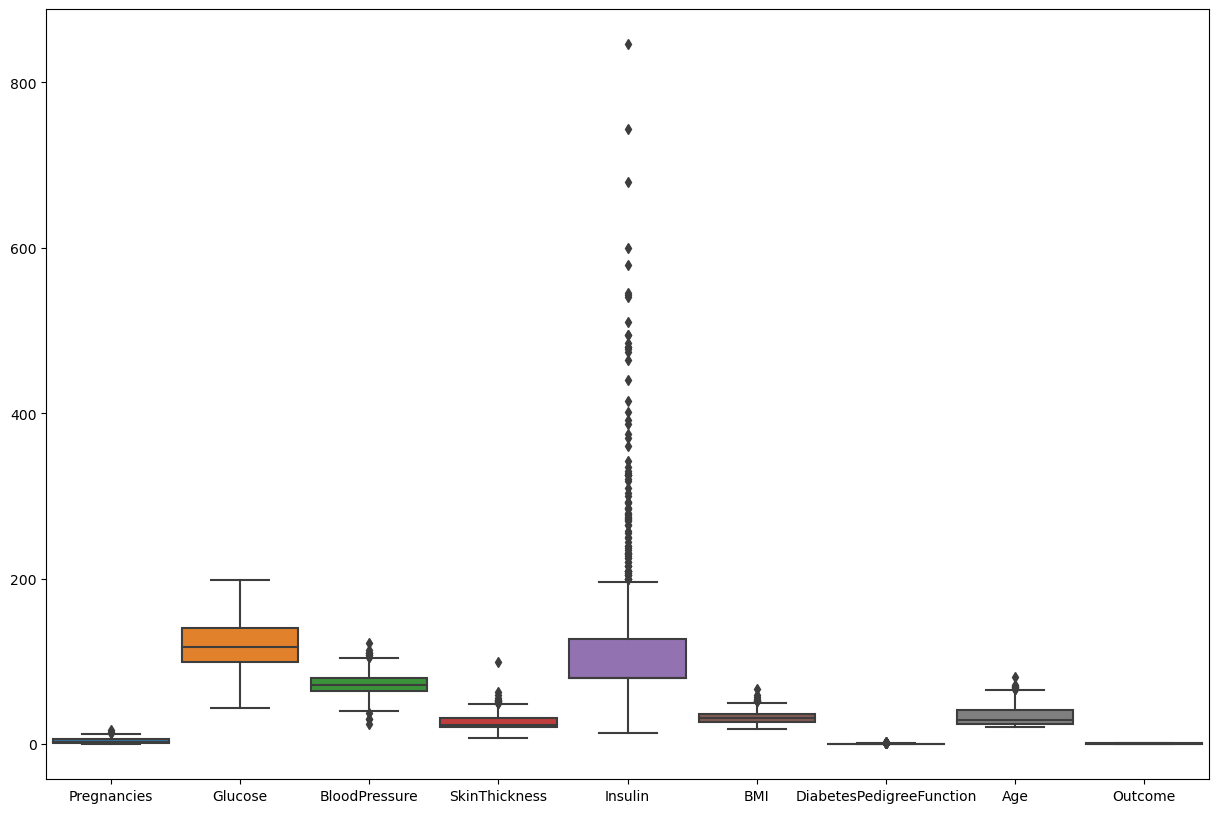

In [7]:
#now all valus seems to be in the range
# now lets se for the outliers of the dta
plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.9)

In [8]:
# we can see insulin is having lots of the outliers we can either do feature scaling  or we can replace the val of 0 with median
#lets see sample with replacing val>200 with median and then but will do scaling only coz scaling will solve problem of outlier
# df[df['Insulin']>100]=df['Insulin'].median()

In [9]:
# plt.subplots(figsize=(15,10))
# sns.boxplot(data=df,width=0.9)
# I dont know why the fuck its not working ill learn it later and thn remove outliers with median

In [17]:
# lets scale down the data 
import pickle
def scaler_standard(x_train,x_test):
    scaler= StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled= scaler.transform(x_test)
    file= open('/config/workspace/models/standardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    return x_train_scaled,x_test_scaled

In [11]:
# segragate the dependent and the independent data
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [15]:
#partition into train and test data
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape,x_test.shape

((576, 8), (192, 8))

In [18]:
x_train_scaled,x_test_scaled=scaler_standard(x_train,x_test)

In [20]:
x_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [22]:
## lets train model yayy yayy yayy
log_mode=LogisticRegression()
log_mode.fit(x_train_scaled,y_train)

LogisticRegression()

In [23]:
# we can do hyper parameter tuning 
parameters={'penalty':['l1','l2','elasticnet'],'C':np.logspace(-3,3,7),'solver':['newton-cg','lbfgs','liblinear']}
from sklearn.model_selection import GridSearchCV

In [25]:
logreg=LogisticRegression()
clf=GridSearchCV(logreg,parameters,scoring='accuracy',cv=10)

In [26]:
clf.fit(x_train_scaled,y_train)

/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
350 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/config/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/config/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
Val

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [27]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [28]:
c

0.763793103448276

In [34]:
# lets predict
y_pred=clf.predict(x_test_scaled)

In [36]:
# lets check accuracy
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[117  13]
 [ 26  36]]
0.796875


In [38]:
conf_mat=confusion_matrix(y_test,y_pred)

In [39]:
tp=conf_mat[0][0]#true positive
fp=conf_mat[0][1]#false posotive
fn=conf_mat[1][0]#false negative
tn=conf_mat[1][1]#true negative

In [41]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
accuracy

0.796875

In [42]:
precision=tp/(tp+fp)
precision

0.9

In [44]:
recall=tp/(tp+fn)
recall

0.8181818181818182

In [46]:
f1_score=2*(recall*precision)/(recall+precision)
f1_score

0.8571428571428572

In [47]:
file1=open('/config/workspace/models/modelPred.pkl','wb')
pickle.dump(clf,file1)
file1.close()